In [30]:
import sys
encoderpath = 'C:\\Users\\debrewa\\Documents\\Personal-projects\\EnDeCoder-webapp\\encoder'
if encoderpath not in sys.path:
    sys.path.append('C:\\Users\\debrewa\\Documents\\Personal-projects\\EnDeCoder-webapp\\encoder')

In [11]:
from encoder import caesar
import pandas as pd
import time
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('blogtext.csv')
data.head()

id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  2059027   male   15            Student       Leo   13,May,2004   
2  2059027   male   15            Student       Leo   12,May,2004   
3  2059027   male   15            Student       Leo   12,May,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   

                                                text  
0             Info has been found (+/- 100 pages,...  
1             These are the team members:   Drewe...  
2             In het kader van kernfusie op aarde...  
3                   testing!!!  testing!!!            
4               Thanks to Yahoo!'s Toolbar I can ...

In [13]:
data['text'][0:3]

0               Info has been found (+/- 100 pages,...
1               These are the team members:   Drewe...
2               In het kader van kernfusie op aarde...
Name: text, dtype: object

In [14]:
import re
import unicodedata

def strip_accents(text):
    """
    Strip accents from input String.

    :param text: The input string.
    :type text: String.

    :returns: The processed String.
    :rtype: String.
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

In [92]:
start = time.time()

enc = caesar.CaesarEncoder("")
source = list(data['text'][0:10000])
processed_source = []
for text in source:
    text = re.sub(r'[!@#$(),"%^*?:;~`0-9.\'\-&/=><{}+\\| ]', '', text)
    text = re.sub(r'[\[\]]', '', text)
    text = strip_accents(text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    processed_source.append(text)

target = []
rotations = []
for text in processed_source:
    enc.randomize()
    enc.text = text
    target.append(enc.encoded_text) 
    rotations.append(enc.rotation)
    
time.time()-start

21.330806016921997

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(rotations)

In [94]:
from sklearn.model_selection import train_test_split
target_train, target_test, y_train, y_test = train_test_split(target, y, test_size = 0.20)

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x_train = cv.fit_transform(target_train).toarray()
x_test = cv.transform(target_test)
x_train.shape

(8000, 7962)

In [96]:
for i,x in enumerate(x_train):
    if sum(x) > 1:
        print(re.sub(r'[abcdefghijklmnopqrstuvwxyz]','',target_train[i]))
        break

In [97]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [98]:
y_pred = model.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.0445


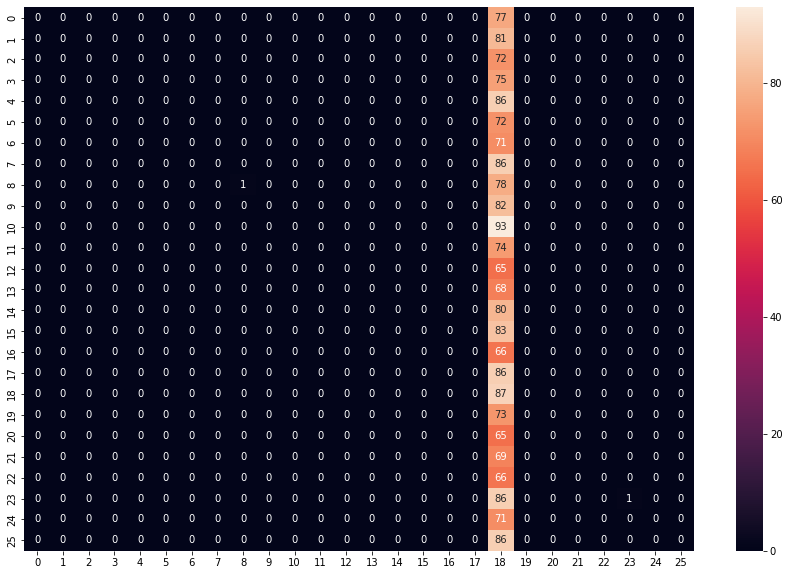

In [100]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [53]:
wrong_pred = x_test[y_pred != y_test][-2].reshape(1, -1)
wrong_proba = model.predict_proba(wrong_pred)
wrong_proba

array([[3.00952735e-14, 4.18352275e-14, 8.22683898e-11, 3.15215741e-15,
        1.77122001e-06, 2.72939004e-07, 2.32501613e-13, 2.28650296e-15,
        1.02663741e-11, 3.69762293e-13, 5.11001895e-07, 5.69665894e-14,
        8.09958268e-13, 3.31300974e-07, 9.99969411e-01, 1.98195349e-15,
        3.19675556e-14, 9.20574259e-14, 2.47175969e-14, 3.24440940e-11,
        1.99143874e-10, 7.87172601e-15, 2.53467415e-15, 6.34053316e-16,
        2.77025150e-05, 1.08964534e-11]])

In [54]:
orig = cv.inverse_transform(wrong_pred)
orig

[array(['bm', 'cs', 'erikk', 'ghc', 'hc', 'ig', 'imjcemk', 'kkk', 'mqr',
        'mt', 'npmepykgpy', 'npmhcir', 'npmqjytjhyjg', 'ny', 'qc', 'qipgt',
        'qjmtc', 'qty', 'rpc', 'sr', 'sčgk', 'tqrmny', 'xcjm', 'xyčcjy',
        'yirgt', 'zmkm', 'šc', 'šrgpg'], dtype='<U305')]